In [1]:
#load libraries 
import time,os
from matplotlib.offsetbox import AnchoredText
import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines, numpy as np, math, pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#import cudf
#import ROOT
#from ROOT import TFile

#import root_pandas

#from toggle_cell import hide_cell 
#import uproot3
%matplotlib inline

#presets for plot style
from scipy.constants import golden
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7/golden),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap('inferno', 12)
autumn = cm.get_cmap('autumn', 12)

#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
#tf.config.experimental.set_memory_growth(physical_devices[1], True)
rc = plt.rc
rc('text', usetex=False)
import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=False)
rc('font', size=15)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

import root_pandas,glob

import gc

import uproot
def read_n(pattern, n):
    if not '*' in pattern:
        a = root_pandas.read_root(pattern,chunksize=int(n))
    else:
        a = root_pandas.read_root(glob.glob(pattern),chunksize=int(n))
    for b in a:
        del a
        print(n)
        return b

from scipy.optimize import curve_fit

image_dir='images'

#import misc_util#correlation_plots

import R2h_module
#import imp
#imp.reload(R2h_module)

import mplhep as hep
hep.style.use("CMS")

In [2]:
def getdatainChunks(filename,treename):
    dataframe =pd.DataFrame()
    file = uproot.open(filename) 
    tree=file[treename]
    df=tree.arrays(filter_name='*',library='pd')
    return df

In [3]:
%%time
dfs_pair = {}
dfs_trigger = {}
#path_data="/home/sebouh/di-hadron"
#path_data="/home/seba/di-hadron/P27"
path_data="/media/eic_ucr/sebouh/di-hadron/P27"
path_data="/media/miguel/Elements/backup_07-27-23/nvme0n1p2/home/seba/di-hadron/P27/"
path_data="P27"
for target in ['C','Fe','Pb']:
    print ('Getting dataframes from target %s'%target)
    dfs_pair[target]=getdatainChunks('%s/Pairs_%s.root'%(path_data,target), target)
    dfs_pair['D_%s'%target]= getdatainChunks('%s/Pairs_%s.root'%(path_data,target), 'D_%s'%target)  
    print ('Get trigger dataframes from deuterium target %s'%target)
    dfs_trigger['%s'%target] = getdatainChunks('%s/Pairs_%s.root'%(path_data,target), 
                                                      '%s_trigger'%target)
    dfs_trigger['D_%s'%target] = getdatainChunks('%s/Pairs_%s.root'%(path_data,target), 
                                                        'D_%s_trigger'%target)

Getting dataframes from target C
Get trigger dataframes from deuterium target C
Getting dataframes from target Fe
Get trigger dataframes from deuterium target Fe
Getting dataframes from target Pb
Get trigger dataframes from deuterium target Pb
CPU times: user 4.45 s, sys: 436 ms, total: 4.88 s
Wall time: 4.89 s


/tmp/ipykernel_2894107/3177083883.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.hist2d(dfs_pair[A].query(q).eval('h1_z*nu')[s:], dfs_pair[A].query(q)['h1_th'][s:], bins=100)
/tmp/ipykernel_2894107/3177083883.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.hist2d(dfs_pair[A].query(q).eval('h1_z*nu')[s:], dfs_pair[A].query(q)['h1_th'][s:], bins=100)


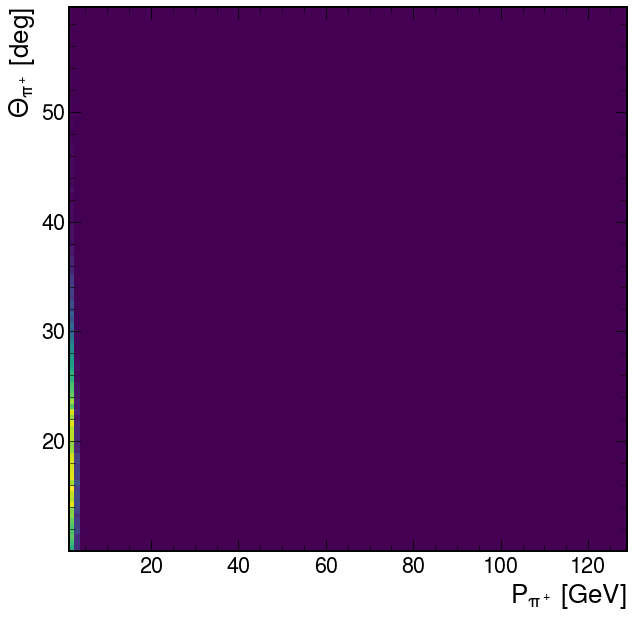

/tmp/ipykernel_2894107/3177083883.py:13: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.hist2d(dfs_pair[A].query(q).eval('h2_z*nu')[s:], dfs_pair[A].query(q)['h2_th'][s:], bins=100)
/tmp/ipykernel_2894107/3177083883.py:13: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.hist2d(dfs_pair[A].query(q).eval('h2_z*nu')[s:], dfs_pair[A].query(q)['h2_th'][s:], bins=100)


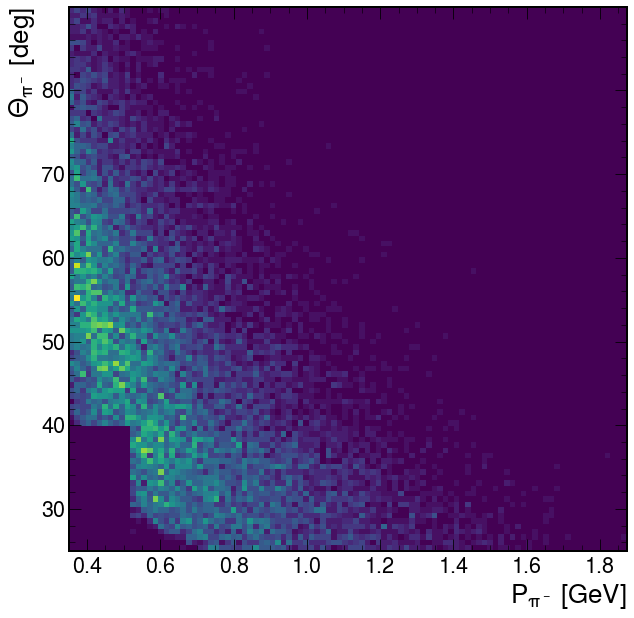

In [4]:
pid=211
pT2min=0.25
pT1min=0.25
pMin=.350
q = f"h1_pid=={pid}  and h2_z>0.05 and h2_z<0.45 and h1_cm_pt > {pT1min} and "+\
                 f"h2_cm_pt > {pT2min} and h1_z>0.5 and h2_pid=={-pid} and h2_z*nu>{pMin}"
s=1000
for A in "C".split():
    plt.hist2d(dfs_pair[A].query(q).eval('h1_z*nu')[s:], dfs_pair[A].query(q)['h1_th'][s:], bins=100)
    plt.xlabel("$P_{\pi^+}$ [GeV]")
    plt.ylabel("$\\Theta_{\pi^+}$ [deg]")
    plt.show()
    plt.hist2d(dfs_pair[A].query(q).eval('h2_z*nu')[s:], dfs_pair[A].query(q)['h2_th'][s:], bins=100)
    plt.xlabel("$P_{\pi^-}$ [GeV]")
    plt.ylabel("$\\Theta_{\pi^-}$ [deg]")
    plt.show()

In [5]:
%%time
import R2h_module as r2h

for key in dfs_pair.keys():
    isMC = False
    if 'GiBUU' in key:
        isMC=True
    print ('\nkey: ',key)
    dfs_pair[key].rename(columns={'h1_FidCut':'h1_FidCutPiPlus'}, inplace=True)
    dfs_pair[key].rename(columns={'h2_FidCut':'h2_FidCutPiPlus'}, inplace=True)
    dfs_pair[key] = r2h.applyCuts(dfs_pair[key],isMC=isMC, nomCuts=True)
    dfs_pair[key] = r2h.applyCutsPair(dfs_pair[key],isMC=isMC, nomCuts=True)


key:  C
Entries before cut  131591
Q2>1.0 and Q2<4.0 131591  (100.00  %)
0.2<h1_p<5.0  131585  (100.00  %)
inelasticity < 0.85 131585  (100.00  %)
h1_pid = pions (trigger) 131585  (100.00  %)
2.2 < nu <4.2 129258  (98.23  %)
10< h1_th 129258  (100.00  %)
Theta/P fiducial region selected for trigger hadron 129258  (100.00  %)
Nom cuts for the trigger applied 44785  (34.65  %)
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 44785  (100.00  %)
2.2 < nu < 4.2 44785  (100.00  %)
secondary hadrons are pions 44785  (100.00  %)
(h1_pid*h2_pid)<0, opposite charge pions 35717  (79.75  %)
kinematic limits for h2_z 35636  (99.77  %)
kinematic limits for dphi 35596  (99.89  %)
kinematic limits for pair_mass 35415  (99.49  %)
leading hadrons are pions 35415  (100.00  %)
0.2<h2_p<5.0 35415  (100.00  %)
0.2<h1_p<5.0 35415  (100.00  %)
10<h2_th 35415  (100.00  %)
Theta/P fiducial region selected for secondary hadron 32420  (91.54  %)
10< h1_th 32420  (100.00  %)
Theta/P fiducial region

/tmp/ipykernel_2894107/2618858060.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.hist2d(dfs_pair[A].query(q)['h1_p'][s:], dfs_pair[A].query(q)['h1_th'][s:], bins=100, range=((0,3.5),(0, 90)))
/tmp/ipykernel_2894107/2618858060.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.hist2d(dfs_pair[A].query(q)['h1_p'][s:], dfs_pair[A].query(q)['h1_th'][s:], bins=100, range=((0,3.5),(0, 90)))


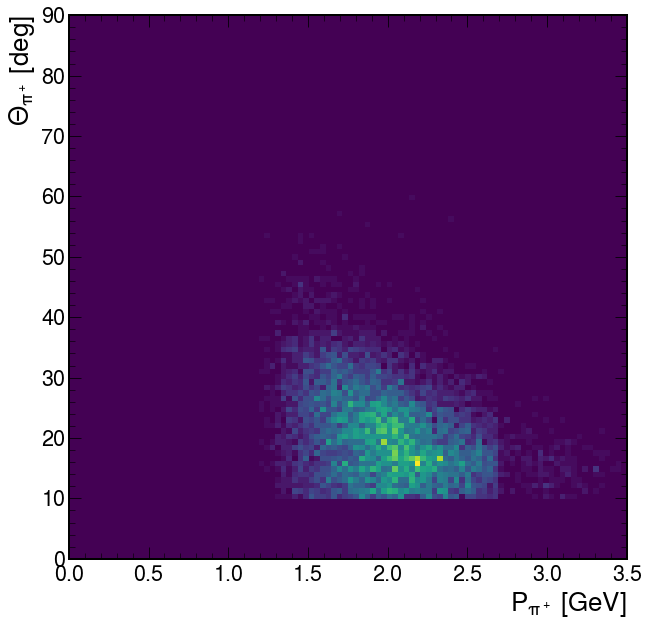

/tmp/ipykernel_2894107/2618858060.py:13: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.hist2d(dfs_pair[A].query(q)['h2_p'][s:], dfs_pair[A].query(q)['h2_th'][s:], bins=100, range=((0,1.7),(0, 90)))
/tmp/ipykernel_2894107/2618858060.py:13: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.hist2d(dfs_pair[A].query(q)['h2_p'][s:], dfs_pair[A].query(q)['h2_th'][s:], bins=100, range=((0,1.7),(0, 90)))


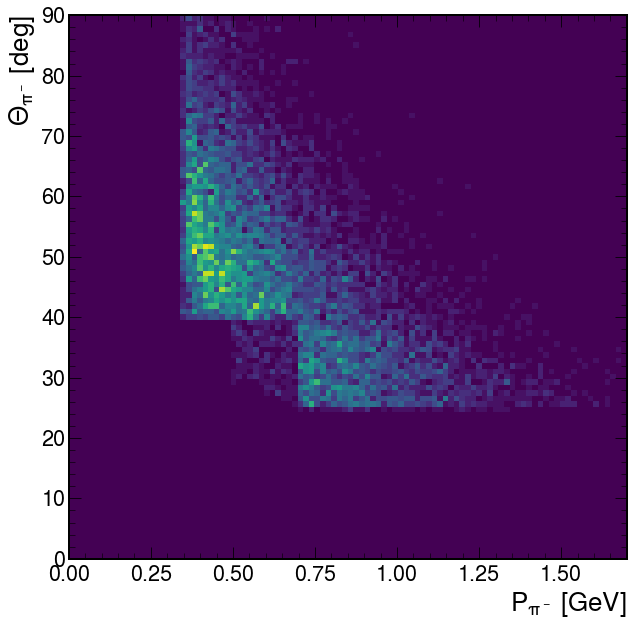

In [6]:
pid=211
pT2min=0.25
pT1min=0.25
pMin=.350
q = f"h1_pid=={pid}  and h2_z>0.05 and h2_z<0.45 and h1_cm_pt > {pT1min} and "+\
                 f"h2_cm_pt > {pT2min} and h1_z>0.5 and h2_pid=={-pid} and h2_p>{pMin}"
s=1000
for A in "C".split():
    plt.hist2d(dfs_pair[A].query(q)['h1_p'][s:], dfs_pair[A].query(q)['h1_th'][s:], bins=100, range=((0,3.5),(0, 90)))
    plt.xlabel("$P_{\pi^+}$ [GeV]")
    plt.ylabel("$\\Theta_{\pi^+}$ [deg]")
    plt.show()
    plt.hist2d(dfs_pair[A].query(q)['h2_p'][s:], dfs_pair[A].query(q)['h2_th'][s:], bins=100, range=((0,1.7),(0, 90)))
    plt.xlabel("$P_{\pi^-}$ [GeV]")
    plt.ylabel("$\\Theta_{\pi^-}$ [deg]")
    plt.show()